# imports necessary Libraries

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# First Generate the Sample dataset from given equation y = 5x^3-8x^2-7x+1

In [15]:
# take x values randomly in the range -20 to 20
x = np.random.randint(-20, 20, 10000)
y = 5 * x**3 - 8 * x**2 - 7 * x + 1

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

# Spliting the dataset into test,train and validation set

In [16]:
size = len(x_data)
x_train, y_train = x_data[: int(size * 0.9)] , y_data[: int(size * 0.9)]
x_validation, y_validation = x_data[int(size * 0.9) : int(size * 0.95)] , y_data[int(size * 0.9) : int(size * 0.95)]
x_test , y_test = x_data[int(size * 0.95) :] , y_data[int(size * 0.95) :]

# Ploting the Dataset

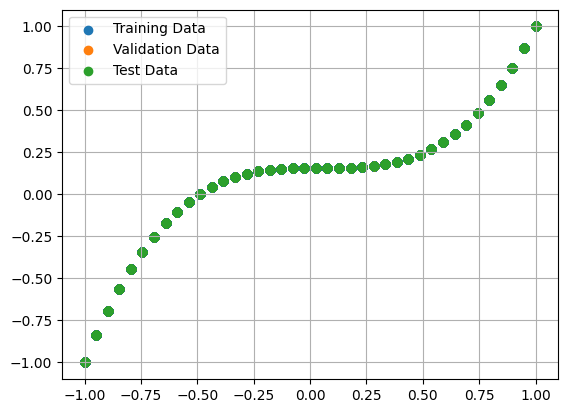

In [17]:
plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_validation, y_validation, label = "Validation Data")
plt.scatter(x_test, y_test, label = "Test Data")
plt.legend()
plt.grid()
plt.show()

# Model build and summary

In [18]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                64        
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Train

In [19]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data=(x_validation, y_validation), verbose = 0)
history = trained_model.history

# Plotting Training and Validation

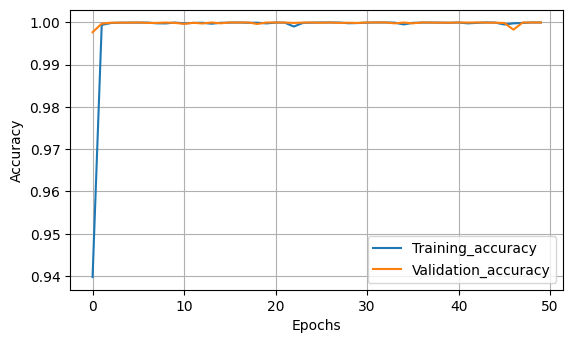

In [20]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)

plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()
plt.show()

# Training and Validation Loss

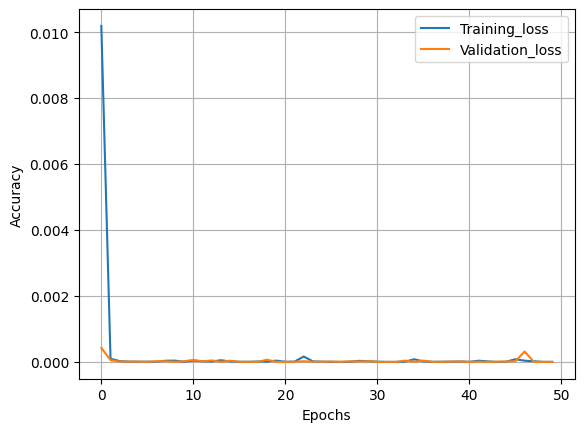

In [21]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

# Model Evaluating and Prediction

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

predictions = model.predict(x_test)

16/16 [==============================] - 0s 2ms/step - loss: 4.9833e-07 - accuracy: 1.0000
Test Loss: 0.0000005
Test Accuracy: 99.99968%
16/16 [==============================] - 0s 2ms/step


# Prediction Vs Acctual lavel

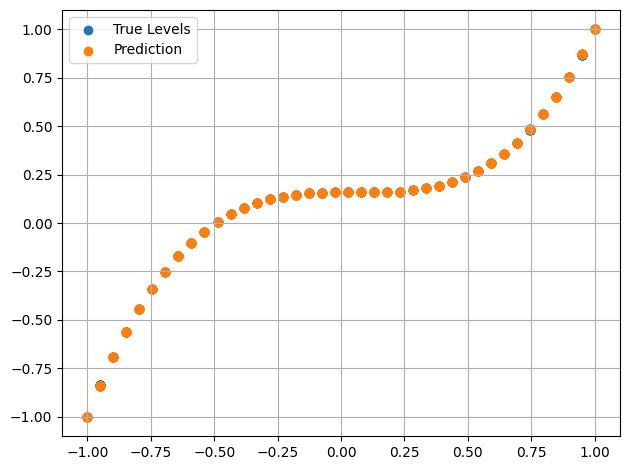

In [23]:
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(["True Levels", "Prediction"])
plt.tight_layout()
plt.grid()
plt.show()